# 📄 `FNCC para treinamento de funções via Tensor Flow`

Este projeto demonstra como construir, treinar e avaliar uma FNCC utilizando utilizando o pacote **TensorFlow**, para aproximar algumas funções. Este exemplo inicial visa explicar a implementação do código para a função $f(x) = e^{-x^2}$.

---

## 1. Importação das Bibliotecas

```python
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

---

## 2. Geração dos Dados de Treinamento

```python
np.random.seed(42)
num_samples = 500
data_train = np.random.uniform(-10, 10, num_samples).reshape(-1, 1)
gauss_values_train = np.exp(-np.square(data_train))
# Adiciona ruído gaussiano
noise = np.random.normal(0, 0.05, gauss_values_train.shape)
gauss_values_train += noise
```

- Gera 500 pontos aleatórios entre -10 e 10 com a seed 42.
- Calcula a função $e^{-x^2}$ para cada ponto.
- Adiciona ruído (noise) para simular um cenário mais realista.

---

## 3. Definição do Modelo FCNN

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)  # saída contínua (linear)
])
```

- Cria a rede neural sequencial com 2 camadas ocultas (10 neurônios cada) utilizando o Keras
- Keras é uma Interface de Programação de Aplicações implementada pelo TensorFlow para criar a estrutura da rede neural, aplicando os pesos, bias e funções de ativação.
- Nesse caso, a função de ativação escolhida é a `relu`, pois o domínio é o mesmo que a da função de treinamento.
- O `input_shape` especifica o formato dos dados de entrada: no caso é 1D, uma lista de valores de $x$.
- Por fim, como essa rede neural retorna um valor de saída, um número real contínuo (a predição para a função de treinamento), essa saída deve ter apenas **1 neurônio**, sem ativação (linear).

---

## 4. Compilação e Treinamento

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

model.fit(data_train, gauss_values_train, epochs=1000, verbose=0)
```

- Otimizador: Adam (gradiente descendente aprimorado) com taxa de aprendizado $\alpha$ de 0.001.
- Função de perda: MSE (erro quadrático médio).
- Treinamento por 1000 épocas (quantidade de iterações).
- `verbose=0` não mostra a barra de progresso com informações sobre cada epoch de treinamento, incluindo a perda (loss) e o tempo.

---

## 5. Geração dos Dados de Teste

```python
num_test_samples = 50
data_test = np.linspace(-15, 15, num_test_samples).reshape(-1, 1)
gauss_values_true = np.exp(-np.square(data_test))
```

- Gera 50 pontos de teste igualmente espaçados no intervalo $[-15, 15]$ para a rede neural prever a função além dos pontos de treinamento.

---

## 6. Previsões e Avaliação

```python
gauss_values_predicted = model.predict(data_test)

# Cálculo manual do MSE (sem sklearn)
mse = np.mean(np.square(gauss_values_true - gauss_values_predicted))
print(f"Mean Squared Error on Test Data: {mse}")
```

- Faz previsões com o modelo treinado.
- Calcula o erro quadrático médio manualmente com NumPy.

---

## 7. Visualização dos Resultados

```python
plt.figure(figsize=(6, 5))
plt.scatter(data_train, gauss_values_train, label='Training Data', alpha=0.5)
plt.plot(data_test, gauss_values_true, label=r'True $e^{-x^2}$', color='blue')
plt.plot(data_test, gauss_values_predicted, label=r'Predicted $e^{-x^2}$', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-x^2}$')
plt.title(r'Aproximação de $e^{-x^2}$ com FCNN (TensorFlow)')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
```

- Plota os dados de treino com ruído, a curva real e a curva predita.
- Visualmente, permite avaliar se o modelo aprendeu bem a função.

---

## ✅ Conclusão

Com apenas TensorFlow e NumPy, conseguimos treinar uma rede neural simples para aproximar uma função matemática suave. Mesmo com ruído, o modelo é capaz de aprender a estrutura subjacente da função $f(x) = e^{-x^2}$, mostrando o poder das redes neurais em tarefas de regressão.

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

plt.rcParams['font.size'] = 16

In [30]:
# 1. Gerar dados de treinamento
np.random.seed(42)
num_samples = 1000
data_train = np.random.uniform(-10, 10, num_samples).reshape(-1, 1)
gauss_values_train = np.exp(-np.square(data_train))

# Adiciona ruído para simular dados reais
noise = np.random.normal(0, 0.01, gauss_values_train.shape)
gauss_values_train += noise

# 2. Criar o modelo FCNN com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# 4. Treinar o modelo
model.fit(data_train, gauss_values_train, epochs=500, verbose=0)

# 5. Gerar dados de teste
num_test_samples = 50
data_test = np.linspace(-15, 15, num_test_samples).reshape(-1, 1)
gauss_values_true = np.exp(-np.square(data_test))

# 6. Fazer previsões
gauss_values_predicted = model.predict(data_test)

# 7. Calcular o erro quadrático médio manualmente
mse = np.mean(np.square(gauss_values_true - gauss_values_predicted))
print(f"Mean Squared Error on Test Data: {mse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mean Squared Error on Test Data: 7.256248228283853e-05


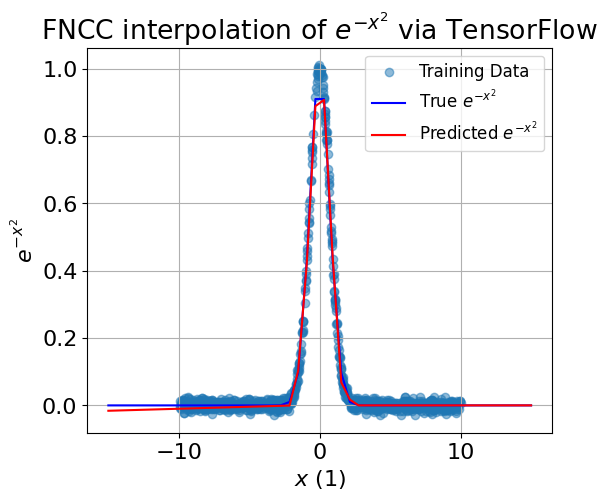

In [31]:
# 8. Visualizar os resultados
plt.figure(figsize=(6, 5))
plt.scatter(data_train, gauss_values_train, label='Training Data', alpha=0.5)
plt.plot(data_test, gauss_values_true, label=r'True $e^{-x^2}$', color='blue')
plt.plot(data_test, gauss_values_predicted, label=r'Predicted $e^{-x^2}$', color='red')
plt.xlabel(r'$x$ (1)')
plt.ylabel(r'$e^{-x^2}$')
plt.title(r'FNCC interpolation of $e^{-x^2}$ via TensorFlow')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9242  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8176
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7337
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6497
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5670 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4860 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4370 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3931 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3480 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2903
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2684
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2073
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1912
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1678
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1718 
Epoch 16/500
4/4 ━

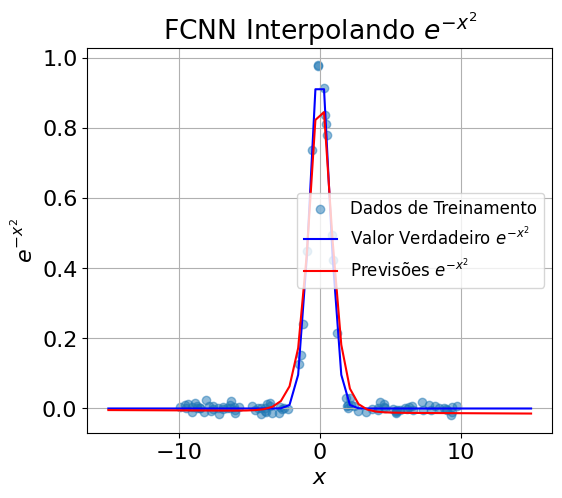

In [15]:
# 1. Gerar Dados de Treinamento
np.random.seed(42)  # Para garantir a reprodutibilidade
num_samples = 100
data_train = np.random.uniform(-10, 10, num_samples).reshape(-1, 1)  # Reshape para (n_samples, n_features)
gauss_values_train = np.exp(-(data_train)**2)

# Adicionar um pouco de ruído aos dados de treinamento
noise = np.random.normal(0, 0.01, gauss_values_train.shape)
gauss_values_train += noise

# 2. Definir o Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# 3. Definir o Otimizador e a Função de Perda
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usando o Adam como otimizador
    loss='mse'  # MSE (Mean Squared Error) para um problema de regressão
)

# 4. Configurar o EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',       # Monitorando a perda durante o treinamento
    patience=50,          # O número de épocas que o modelo pode continuar sem melhorar
    min_delta=1e-8,       # Tolerância ao erro (mínima melhoria para continuar treinando)
    verbose=1,            # Exibir mensagens quando o early stopping ocorrer
    mode='min',           # Modo de minimização, já que estamos minimizando a perda
    restore_best_weights=True  # Restaurar os melhores pesos quando o treinamento for interrompido
)

# 5. Gerar Dados de Teste para Avaliação
num_test_samples = 50
data_test = np.linspace(-15, 15, num_test_samples).reshape(-1, 1)
gauss_values_true = np.exp(-(data_test)**2)

# 6. Treinar o Modelo com EarlyStopping
history = model.fit(
    data_train, gauss_values_train,  # Dados de treinamento
    epochs=500,                     # Número máximo de épocas
    verbose=1,                       # Exibir a barra de progresso
    callbacks=[early_stopping]       # Usar o EarlyStopping durante o treinamento
)

# 7. Fazer Previsões com o Modelo Treinado
gauss_values_predicted = model.predict(data_test)

# 9. Visualizar os Resultados
plt.figure(figsize=(6, 5))
plt.scatter(data_train, gauss_values_train, label='Dados de Treinamento', alpha=0.5)
plt.plot(data_test, gauss_values_true, label=r'Valor Verdadeiro $e^{-x^2}$', color='blue')
plt.plot(data_test, gauss_values_predicted, label=r'Previsões $e^{-x^2}$', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-x^2}$')
plt.title(r'FCNN Interpolando $e^{-x^2}$')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()